In [180]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

import numpy as np
import pandas as pd
import os
from scipy.cluster.hierarchy import fcluster, cophenet
import seaborn as sns

%matplotlib inline

In [181]:
data = pd.read_csv('./user_data/final/EDUTECH_combined_v2.csv')
print(len(data))

61


In [182]:
data.head()

,user_name,id,label,user_type,type_data,type,grade_bucket,age_bucket,gender,eng_fluency,...,degree,strongcompnum,closnesscentrality,betweenesscentrality,num_previous_OMSCS,confi_avg,confi_startend_diff,end_pace,end_rigor,cal_hr_expected_calc_change
0,Student71,Student71,Student71,Student,user_graph,student,c,18 to 24,Male,Native speaker,...,14,4,0.595745,59.408311,8,1.8,0,4,4,-1
1,Student14,Student14,Student14,Student,user_graph,student,d,18 to 24,Male,Native speaker,...,1,5,0.311828,0.000000,1,1.8,1,5,4,-1
2,Student72,Student72,Student72,Student,user_graph,student,d,25 to 34,Male,Fully fluent (non-native speaker),...,5,6,0.432836,14.826923,4,1.4,1,4,4,-1
3,Student83,Student83,Student83,Student,user_graph,student,d,25 to 34,Male,Partially fluent,...,4,7,0.381579,0.000000,2,3.0,0,4,3,0
4,Student13,Student13,Student13,Student,user_graph,student,d,35 to 44,Male,Native speaker,...,26,4,0.538462,206.637526,3,1.8,-1,4,4,-1


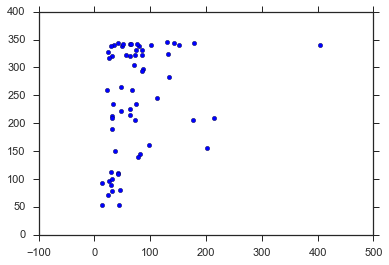

In [183]:
# scatter to guess clusters
plt.scatter(data['posts'], data['views'])
plt.show()

In [184]:
d2 = data.fillna(0)
d2.ix[:, 27:].head()

,asks,answers,posts,views,days,finalgrade,indegree,outdegree,degree,strongcompnum,closnesscentrality,betweenesscentrality,num_previous_OMSCS,confi_avg,confi_startend_diff,end_pace,end_rigor,cal_hr_expected_calc_change
0,0,0,132,324,56,0.782609,2,12,14,4,0.595745,59.408311,8,1.8,0,4,4,-1
1,0,2,25,71,29,0.347826,0,1,1,5,0.311828,0.000000,1,1.8,1,5,4,-1
2,2,0,49,339,54,0.608696,2,3,5,6,0.432836,14.826923,4,1.4,1,4,4,-1
3,2,0,73,322,71,0.608696,0,4,4,7,0.381579,0.000000,2,3.0,0,4,3,0
4,4,0,202,156,49,0.695652,16,10,26,4,0.538462,206.637526,3,1.8,-1,4,4,-1


In [185]:
X =d2.ix[:, 27:].as_matrix(columns=None)
X

array([[   0.,    0.,  132., ...,    4.,    4.,   -1.],
       [   0.,    2.,   25., ...,    5.,    4.,   -1.],
       [   2.,    0.,   49., ...,    4.,    4.,   -1.],
       ..., 
       [   0.,    1.,   31., ...,    0.,    0.,    0.],
       [   1.,    1.,   27., ...,    4.,    4.,    0.],
       [   2.,    0.,   77., ...,    0.,    0.,    0.]])

In [170]:
#use difference distances to print out hierarchical clustering
#dist_types

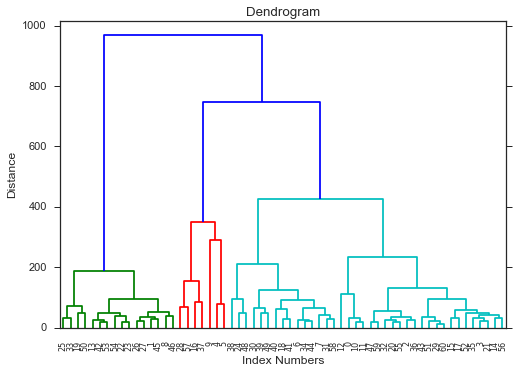

In [171]:
Z = linkage(X, 'ward')
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,
)
plt.show()

In [172]:
max_dist = 450
clusters = fcluster(Z, max_dist, criterion='distance')
print np.unique(clusters)
print clusters

[1 2 3]
[3 1 3 3 2 2 3 3 1 2 3 3 3 1 3 3 2 3 3 1 3 3 1 1 3 1 1 1 2 3 3 3 3 1 3 3 3
 2 3 3 3 3 1 3 3 1 1 3 3 3 1 3 3 1 1 3 3 2 3 3 3]


In [173]:
#apply clusters and get group averages
d2['hclusters'] = clusters
d2.head()

,user_name,id,label,user_type,type_data,type,grade_bucket,age_bucket,gender,eng_fluency,...,strongcompnum,closnesscentrality,betweenesscentrality,num_previous_OMSCS,confi_avg,confi_startend_diff,end_pace,end_rigor,cal_hr_expected_calc_change,hclusters
0,Student71,Student71,Student71,Student,user_graph,student,c,18 to 24,Male,Native speaker,...,4,0.595745,59.408311,8,1.8,0,4,4,-1,3
1,Student14,Student14,Student14,Student,user_graph,student,d,18 to 24,Male,Native speaker,...,5,0.311828,0.000000,1,1.8,1,5,4,-1,1
2,Student72,Student72,Student72,Student,user_graph,student,d,25 to 34,Male,Fully fluent (non-native speaker),...,6,0.432836,14.826923,4,1.4,1,4,4,-1,3
3,Student83,Student83,Student83,Student,user_graph,student,d,25 to 34,Male,Partially fluent,...,7,0.381579,0.000000,2,3.0,0,4,3,0,3
4,Student13,Student13,Student13,Student,user_graph,student,d,35 to 44,Male,Native speaker,...,4,0.538462,206.637526,3,1.8,-1,4,4,-1,2


In [149]:
#add categorical value indicators and re-do hierarchical clustering

In [150]:
#get list of all attributes
#list(d2.ix[:, 27:].columns)

In [174]:
#all vars
aggregation1 = {'id': 'count',
               'engfluency_boolean': 'count', 'male_boolean': 'count', 
              'asks': 'mean', 'answers': 'mean', 'posts': 'mean',
               'views': 'mean', 'days': 'mean',
               'finalgrade': {'finalgrade_avg':'mean', 
                              'finalgrade_min': 'min',
                              'finalgrade_max': 'max'},
               'indegree': 'mean','outdegree': 'mean', 'degree': 'mean',
               'eccentricity': 'mean','closnesscentrality':'mean',
               'harmonicclosnesscentrality': 'mean',
               'betweenesscentrality': 'mean',
               'componentnumber':'mean', 'strongcompnum':'mean',
               'modularity_class': 'mean','num_previous_OMSCS':'mean',
               'num_other_courses': 'mean','confi_avg': 'mean',
               'confi_var': 'mean','confi_startend_diff': 'mean',
               'quarter_confidence': 'mean','quarter_future_confidence': 'mean',
               'mid_confidence':'mean','mid_future_confidence': 'mean',
               'end_confidence': 'mean','pace_avg': 'mean', 'pac_var': 'mean',
               'pac_endstart_diff': 'mean','quarter_pace_eval': 'mean',
               'mid_pace_eval': 'mean', 'end_pace': 'mean','rigor_avg': 'mean',
               'rigor_var': 'mean','rigor_endstart_diff': 'mean',
               'quarter_rigor_eval': 'mean','mid_rigor_eval': 'mean',
               'end_rigor': 'mean', 'cal_hr_expected_calc_change':'mean',
               'end_expect_project_meet_num': 'mean',
               'end_expect_project_exceed_num': 'mean'}

In [175]:
#filtered vars
aggregation2 = {'id': 'count',
               'asks': 'mean', 'answers': 'mean', 'posts': 'mean',
               'views': 'mean', 'days': 'mean',
               'finalgrade': {'finalgrade_avg':'mean', 
                              'finalgrade_min': 'min',
                              'finalgrade_max': 'max'},
               'indegree': 'mean','outdegree': 'mean', 'degree': 'mean',
               'closnesscentrality':'mean',
               'betweenesscentrality': 'mean',
                'strongcompnum':'mean', 'num_previous_OMSCS':'mean',
               'confi_avg': 'mean','confi_startend_diff': 'mean',
                'end_pace': 'mean','end_rigor': 'mean', 
                'cal_hr_expected_calc_change':'mean'}

In [176]:
grp = d2.groupby('hclusters')
hcluster_grp = grp.agg(aggregation2)
hcluster_grp.to_csv('./user_data/final/edutech_hclsuter_output_v3.csv')

In [177]:
hcluster_grp

strongcompnum confi_startend_diff  end_pace     degree      asks  \
                   mean                mean      mean       mean      mean   
hclusters                                                                    
1             17.250000            0.250000  3.375000   3.312500  1.812500   
2              4.000000            0.142857  2.857143  24.000000  3.142857   
3             13.078947            0.078947  2.947368   6.289474  1.842105   

                views   indegree betweenesscentrality confi_avg       posts  \
                 mean       mean                 mean      mean        mean   
hclusters                                                                     
1          102.687500   1.187500             2.822791  1.537500   41.812500   
2          289.285714  15.000000           200.823448  1.342857  184.142857   
3          291.210526   2.789474            17.870295  1.910526   69.526316   

               ...         answers outdegree end_rigor closnesscentrality  \
               ...            mean      mean      mean               mean   
hclusters      ...                                                          
1              ...        0.562500     2.125  3.312500           0.310376   
2              ...        1.857143     9.000  2.857143           0.498441   
3              ...        0.631579     3.500  2.894737           0.351710   

          cal_hr_expected_calc_change    id num_previous_OMSCS     finalgrade  \
                                 mean count               mean finalgrade_min   
hclusters                                                                       
1                           -0.250000    16           2.937500       0.347826   
2                           -0.142857     7           4.571429       0.478261   
3                           -0.421053    38           3.842105       0.434783   

                                         
          finalgrade_max finalgrade_avg  
hclusters                                
1               0.956522       0.608696  
2               0.869565       0.677019  
3               1.000000       0.697940  

[3 rows x 21 columns]

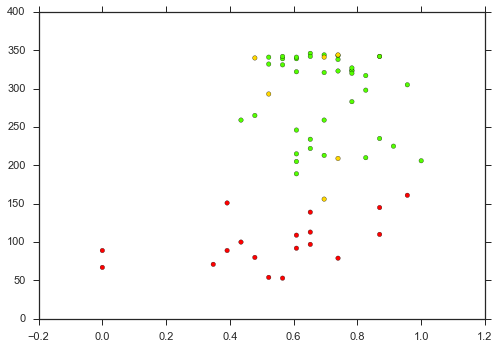

In [160]:
plt.scatter(d2.ix[:,'finalgrade'], d2.ix[:,'views'], c=clusters, cmap='prism')
plt.show()

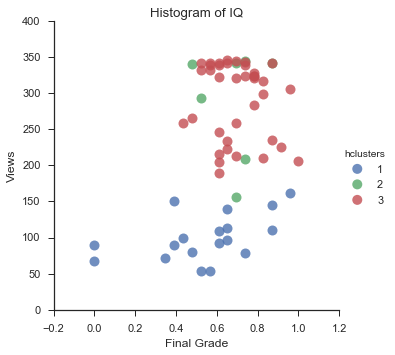

In [161]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('finalgrade', 'views', 
           data=d2, 
           fit_reg=False, 
           hue="hclusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Histogram of IQ')
plt.xlabel('Final Grade')
plt.ylabel('Views')

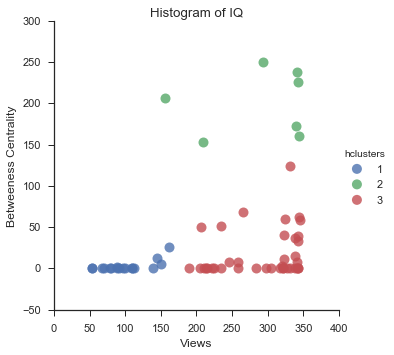

In [164]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('views', 'betweenesscentrality', 
           data=d2, 
           fit_reg=False, 
           hue="hclusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Histogram of IQ')
plt.xlabel('Views')
plt.ylabel('Betweeness Centrality')

ward 0.731693911823
Dendogram


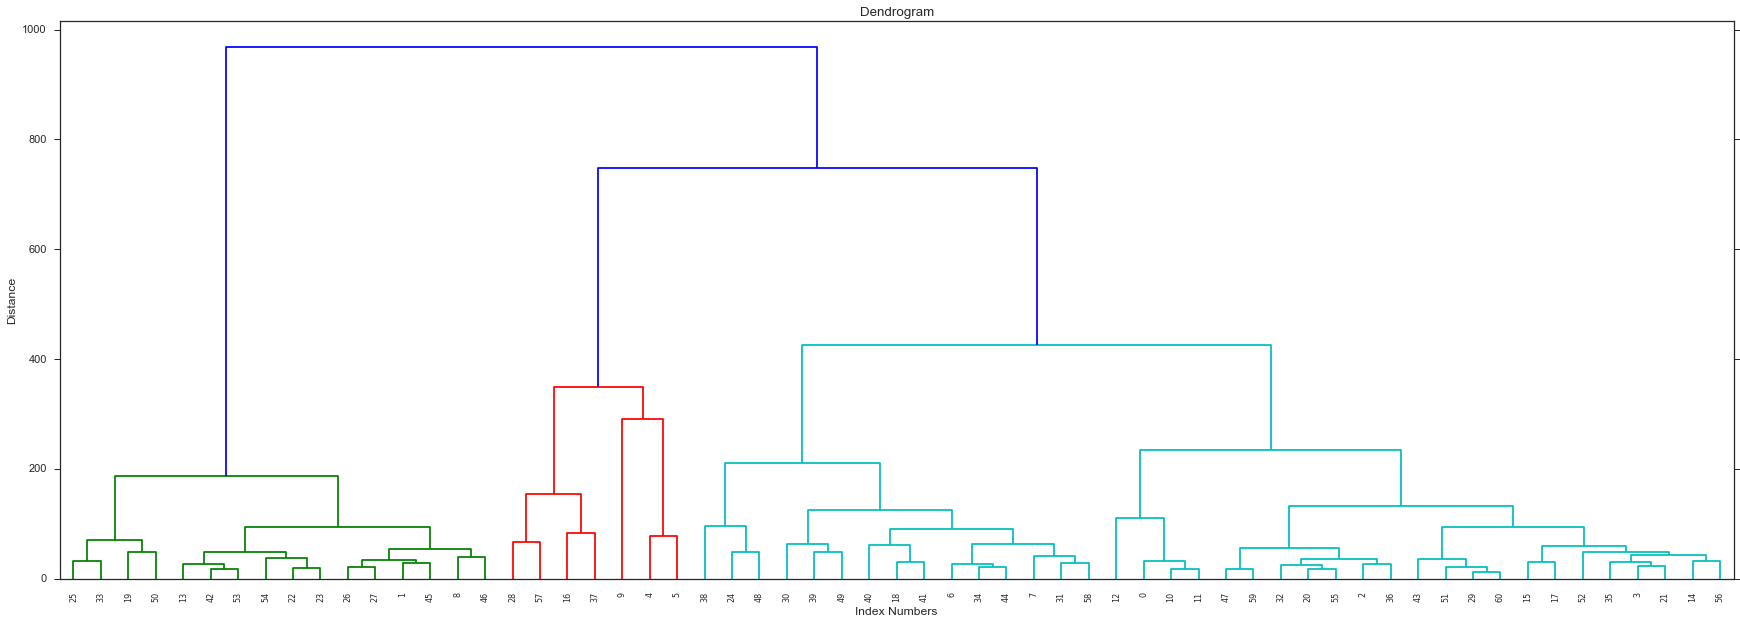

Truncated


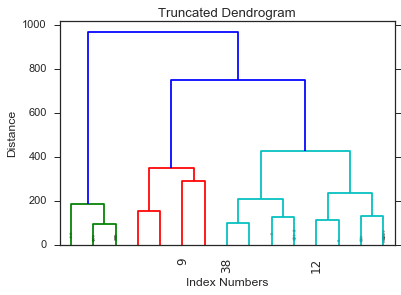

complete 0.803584754997
Dendogram


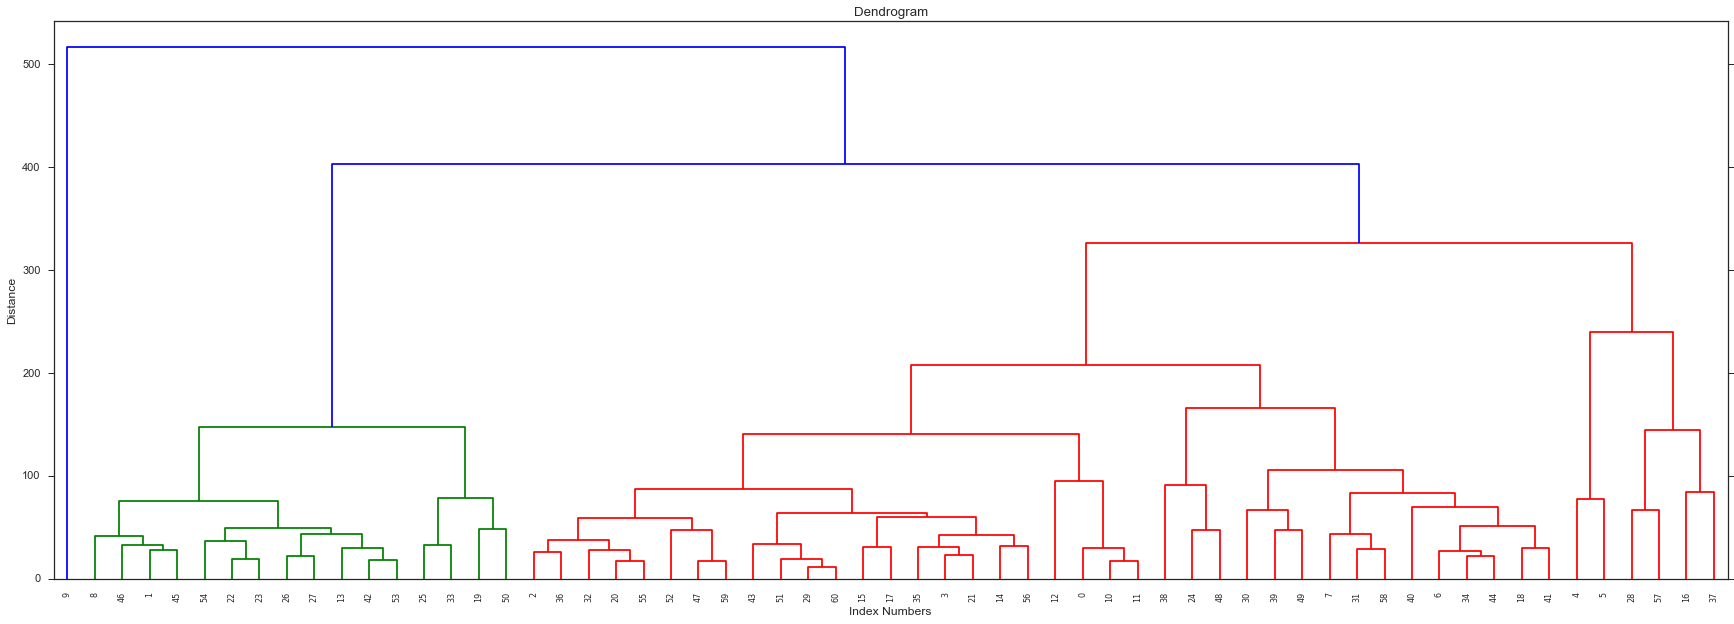

Truncated


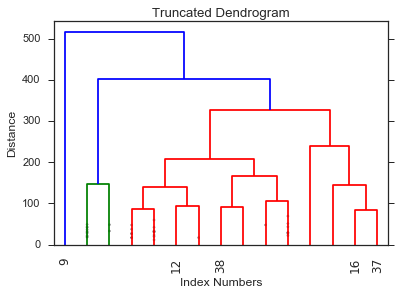

single 0.711383377299
Dendogram


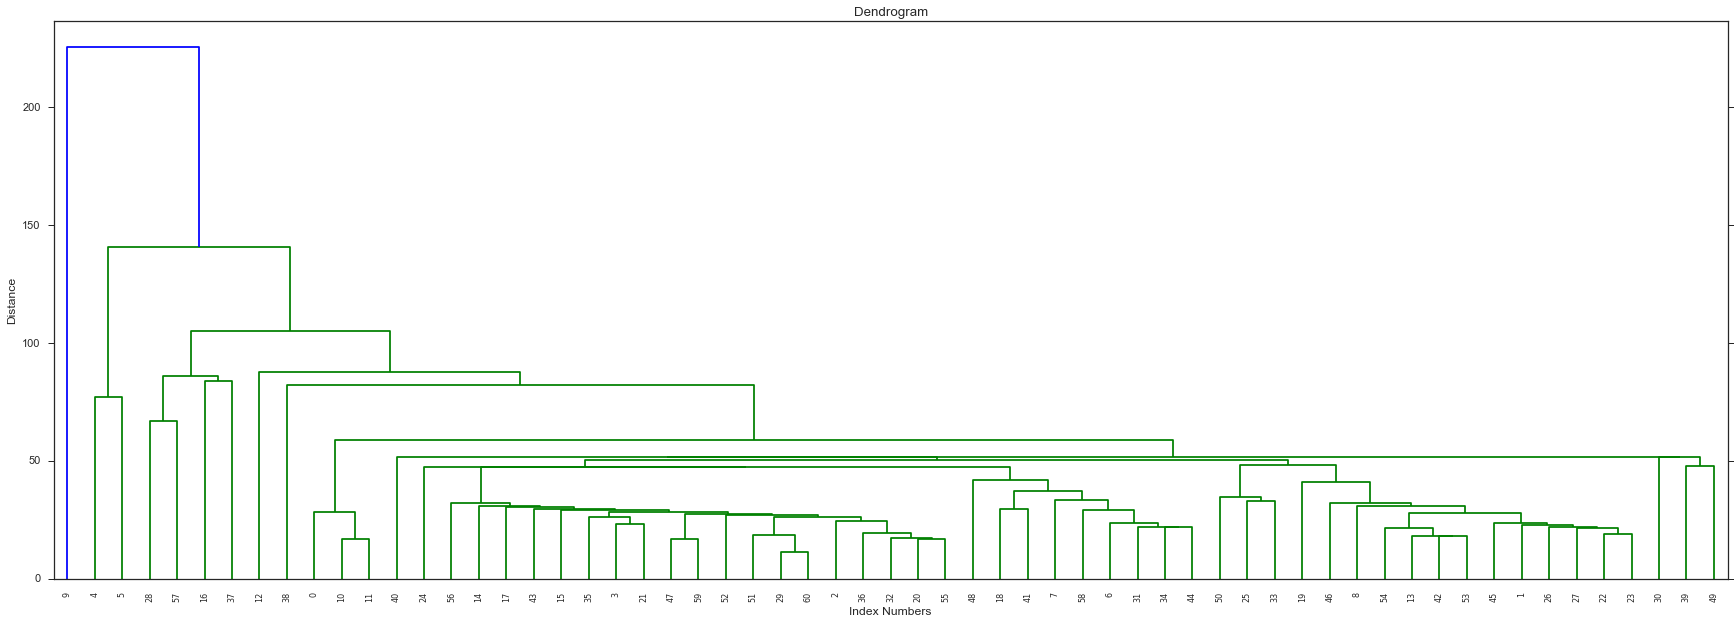

Truncated


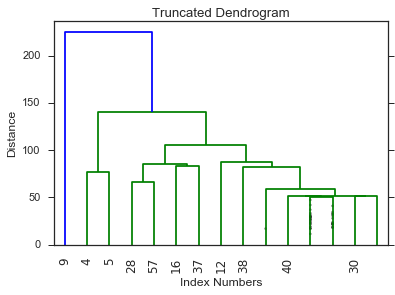

In [186]:
X = d2.ix[:, 27:]
####################### ITERATE THROUGH DISTNACES ################################
from sklearn.grid_search import GridSearchCV
distances = ['ward','complete','single']
for i in distances:
    Z = linkage(X, i)
    c, coph_dists = cophenet(Z, pdist(X))
    print i,c
    print "Dendogram"
    plt.figure(figsize=(30, 10))
    plt.title('Dendrogram')
    plt.xlabel('Index Numbers')
    plt.ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,
    )
    plt.show()
    print 'Truncated'
    plt.title('Truncated Dendrogram')
    plt.xlabel('Index Numbers')
    plt.ylabel('Distance')
    dendrogram(
        Z,
        truncate_mode='lastp',  
        p=15,  
        show_leaf_counts=False,  
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,  
    )
    plt.show()